<a href="https://colab.research.google.com/github/Altaieb-Mohammed/lab_2corse/blob/master/lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Данные успешно загружены.

Все столбцы в датасете:
['text', 'estate', 'total_assets', 'debts', 'funeral_expenses', 'bequests', 'wife', 'husband', 'sons', 'daughters', 'father', 'mother', 'brothers', 'sisters', 'grandchildren']

Используемые признаки (10): ['debts', 'bequests', 'wife', 'husband', 'sons', 'daughters', 'father', 'mother', 'brothers', 'sisters']

Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   text              10000 non-null  object 
 1   estate            10000 non-null  float64
 2   total_assets      10000 non-null  float64
 3   debts             10000 non-null  float64
 4   funeral_expenses  10000 non-null  float64
 5   bequests          10000 non-null  float64
 6   wife              10000 non-null  int64  
 7   husband           10000 non-null  int64  
 8   sons              10000 non-null  

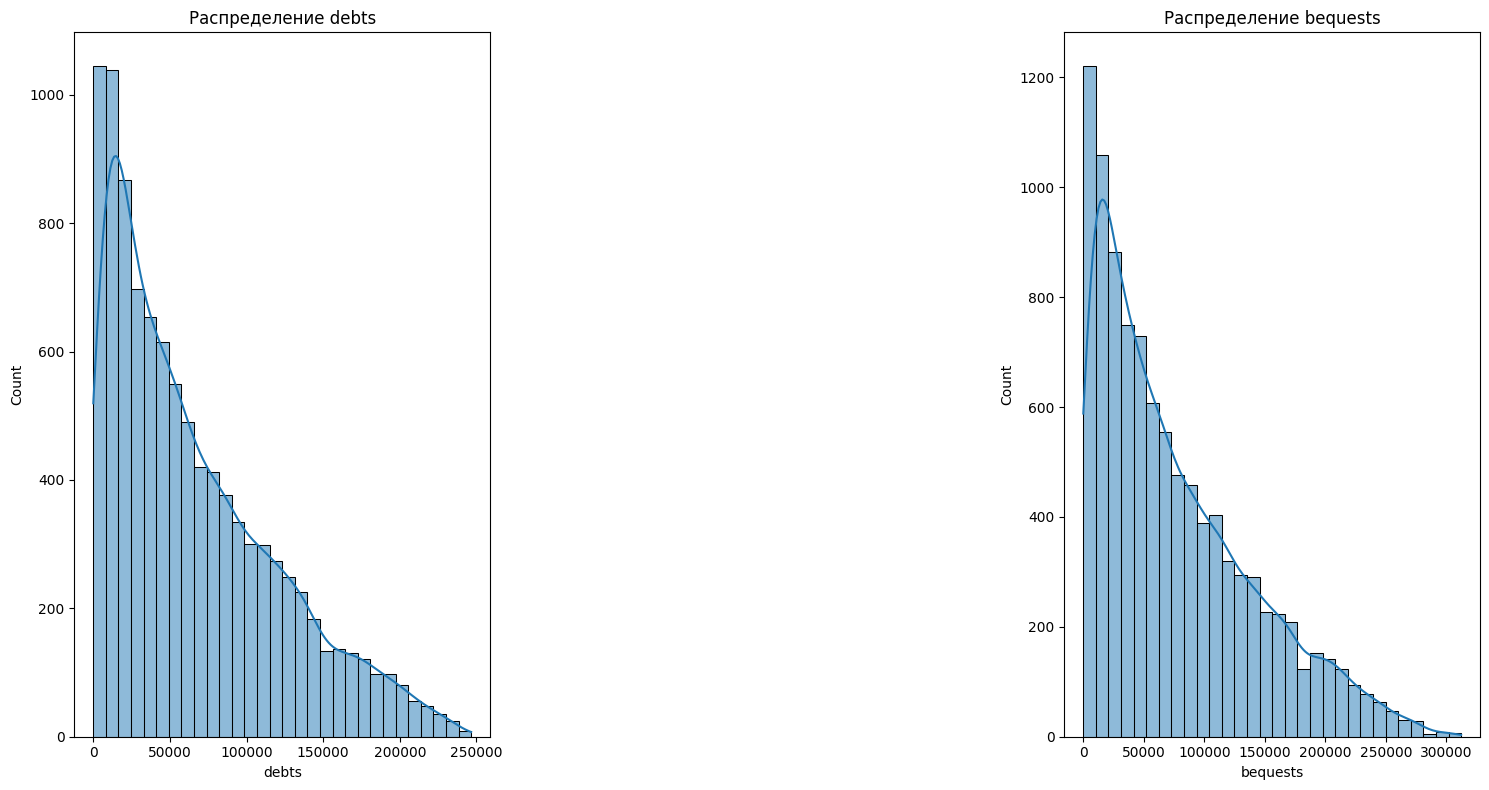

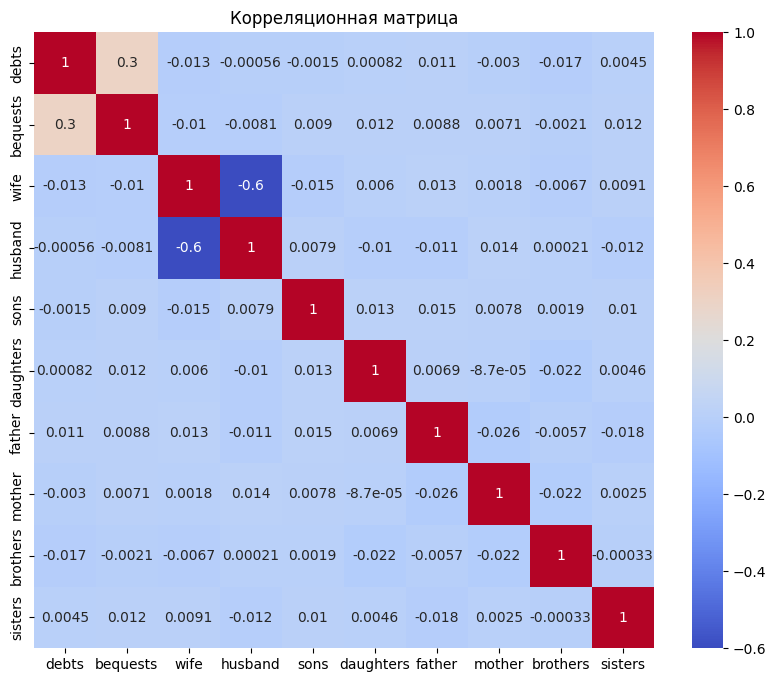


Все данные (очищенные и масштабированные) сохранены в inheritance_combined.csv

Первые строки объединённых данных:
        debts   bequests  wife  husband  sons  daughters  father  mother  \
0   89083.21   47843.65     1        0     1          2       0       0   
1   89149.37  243374.33     1        0     5          5       1       0   
2     648.46   17774.84     0        1     3          1       0       0   
3   23549.63  165834.40     0        0     3          4       1       1   
4  199933.12  177838.94     1        0     5          4       1       0   

   brothers  sisters  ...  debts_standard  bequests_standard  wife_standard  \
0         3        3  ...        0.436273          -0.436317       1.273816   
1         0        1  ...        0.437485           2.607576       1.273816   
2         3        0  ...       -1.184573          -0.904409      -0.785043   
3         2        2  ...       -0.764837           1.400485      -0.785043   
4         2        3  ...        2.46

In [5]:
# ---------------------------------------------------------- Лабораторная работа №1

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import warnings
warnings.filterwarnings('ignore')

# --- Parameters ---
url = "https://raw.githubusercontent.com/Altaieb-Mohammed/lab_2corse/master/dataset.csv"
combined_data_path = "inheritance_combined.csv"

# Desired numeric features (adjust as needed)
desired_features = [
    'debts', 'funeral_e', 'bequests', 'wife', 'husband', 'sons', 'daughters',
    'father', 'mother', 'brothers', 'sisters', 'grandchild'
]

# --- Data Loading ---
try:
    df = pd.read_csv(url)
    print("Данные успешно загружены.")
except Exception as e:
    print(f"Ошибка загрузки данных: {e}")
    raise

print("\nВсе столбцы в датасете:")
print(df.columns.tolist())

# --- Select only existing features ---
existing_features = [col for col in desired_features if col in df.columns]
print(f"\nИспользуемые признаки ({len(existing_features)}): {existing_features}")

# --- Data Inspection ---
print("\nИнформация о данных:")
print(df.info())

print("\nСтатистика по пропущенным значениям по выбранным признакам:")
print(df[existing_features].isnull().sum())

# --- Data Cleaning ---
df_clean = df[existing_features].dropna()

# Filter positive values for key financial columns if they exist
for col in ['debts', 'funeral_e', 'bequests']:
    if col in df_clean.columns:
        df_clean = df_clean[df_clean[col] > 0]

df_clean.reset_index(drop=True, inplace=True)
print(f"\nРазмер очищенных данных: {df_clean.shape}")

# --- Visualize Distributions ---
plt.figure(figsize=(15, 8))
for i, col in enumerate(['debts', 'funeral_e', 'bequests'], 1):
    if col in df_clean.columns:
        plt.subplot(1, 3, i)
        sns.histplot(df_clean[col], bins=30, kde=True)
        plt.title(f'Распределение {col}')
plt.tight_layout()
plt.show()

# --- Correlation Heatmap ---
plt.figure(figsize=(10, 8))
sns.heatmap(df_clean.corr(), annot=True, cmap='coolwarm')
plt.title('Корреляционная матрица')
plt.show()

# --- Scaling ---
minmax_scaler = MinMaxScaler()
df_minmax = pd.DataFrame(
    minmax_scaler.fit_transform(df_clean),
    columns=[f"{col}_minmax" for col in existing_features]
)

standard_scaler = StandardScaler()
df_standard = pd.DataFrame(
    standard_scaler.fit_transform(df_clean),
    columns=[f"{col}_standard" for col in existing_features]
)

# --- Combine all data into one DataFrame ---
df_combined = pd.concat([df_clean, df_minmax, df_standard], axis=1)

# --- Save combined DataFrame ---
df_combined.to_csv(combined_data_path, index=False)
print(f"\nВсе данные (очищенные и масштабированные) сохранены в {combined_data_path}")

# --- Show Data Samples ---
print("\nПервые строки объединённых данных:\n", df_combined.head())

# --- Save scalers for future use ---
import joblib
joblib.dump(minmax_scaler, 'minmax_scaler.pkl')
joblib.dump(standard_scaler, 'standard_scaler.pkl')
print("\nОбъекты скейлеров сохранены: minmax_scaler.pkl, standard_scaler.pkl")


In [7]:
from google.colab import files
files.download('inheritance_combined.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>